In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)

df = pd.read_csv('../../preprocessed/data.csv')
df.dropna(inplace=True)

x = df.drop(columns=['단지명','주소', '거래금액(만원)','계약년월'])
preset = df[['계약년월','거래금액(만원)']]

# .loc 사용하여 안전하게 값 변경
preset.loc[:, '거래금액(만원)'] = preset['거래금액(만원)'].str.replace(',', '', regex=False).astype(float)
preset.loc[:, '계약년월'] = preset['계약년월'].astype(str)

price_index = pd.read_csv('../../preprocessed/가격지수/price_index.csv')

# 가격 지수를 행으로 변환
price_index = price_index.T
price_index.columns = ['price_index']
price_index = price_index.reset_index().rename(columns={'index': '계약년월'})

# preset과 price_index를 '계약년월' 기준으로 병합
merged_df = pd.merge(preset, price_index, on='계약년월', how='left')
merged_df = merged_df.fillna(100)
merged_df['조정된 거래금액(만원)'] = merged_df['거래금액(만원)'] / merged_df['price_index'] * 100

y = merged_df['조정된 거래금액(만원)']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

/var/folders/rw/n5njc9xj6818lwcj0l_fr9200000gn/T/ipykernel_77555/642647953.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['202408' '202408' '202408' ... '202108' '202108' '202108']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  preset.loc[:, '계약년월'] = preset['계약년월'].astype(str)
/var/folders/rw/n5njc9xj6818lwcj0l_fr9200000gn/T/ipykernel_77555/642647953.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df = merged_df.fillna(100)


In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 랜덤포레스트 모델
rf = RandomForestRegressor()

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 그리드 서치 객체 생성
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(x_train, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=

/Users/hdk/anaconda3/envs/qa_system/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   7.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  10.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   6.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  12.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  10.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   7.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   8.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.4s
[CV] END max_depth=Non

/Users/hdk/anaconda3/envs/qa_system/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
456 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hdk/anaconda3/envs/qa_system/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hdk/anaconda3/envs/qa_system/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/hdk/anaconda3/envs/qa_system/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_pa

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [3]:
# Random Forest 최적 하이퍼파라미터 및 성능 확인
print("Random Forest Best Parameters: ", grid_search_rf.best_params_)
print("Random Forest Best Score: ", grid_search_rf.best_score_)

Random Forest Best Parameters:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Random Forest Best Score:  0.9504409003722746


In [4]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# XGBoost 모델
xgb_model = xgb.XGBRegressor()

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# 그리드 서치
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(x_train, y_train)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, m

/Users/hdk/anaconda3/envs/qa_system/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.7; total time=  13.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.7; total time=  12.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.7; total time=  12.8s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.8; total time=  12.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.7; total time=  13.4s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.8; total time=  12.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.8; total time=  13.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.5s
[

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 1.0]},
             verbose=2)

In [5]:
# XGBoost 최적 하이퍼파라미터 및 성능 확인
print("XGBoost Best Parameters: ", grid_search_xgb.best_params_)
print("XGBoost Best Score: ", grid_search_xgb.best_score_)

XGBoost Best Parameters:  {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
XGBoost Best Score:  0.9554137227518916


In [6]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

# CatBoost 모델
cat_model = CatBoostRegressor(silent=True)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'iterations': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}

# 그리드 서치
grid_search_cat = GridSearchCV(estimator=cat_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_cat.fit(x_train, y_train)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END border_count=32, depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.6s
[CV] END border_count=32, depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.6s
[CV] END border_count=32, depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.6s
[CV] END border_count=32, depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.6s
[CV] END border_count=32, depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.7s
[CV] END border_count=32, depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.7s
[CV] END border_count=32, depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.7s
[CV] END border_count=32, depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.7s
[CV] END border_count=32, depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.2; total time=   

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x172f224d0>,
             n_jobs=-1,
             param_grid={'border_count': [32, 64, 128], 'depth': [4, 6, 8],
                         'iterations': [100, 200, 500, 1000],
                         'l2_leaf_reg': [1, 3, 5, 7],
                         'learning_rate': [0.01, 0.1, 0.2]},
             verbose=2)

In [7]:
# CatBoost 최적 하이퍼파라미터 및 성능 확인
print("CatBoost Best Parameters: ", grid_search_cat.best_params_)
print("CatBoost Best Score: ", grid_search_cat.best_score_)

CatBoost Best Parameters:  {'border_count': 128, 'depth': 4, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
CatBoost Best Score:  0.955529526408438


In [9]:
from sklearn.metrics import *

# 최적의 Random Forest 모델로 예측
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(x_test)

# Random Forest 모델 성능
print("Random Forest MSE: ", mean_squared_error(y_test, y_pred_rf))
print("Random Forest MAE: ", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R^2: ", r2_score(y_test, y_pred_rf))
print('---------------------------------')

# 최적의 XGBoost 모델로 예측
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(x_test)

# XGBoost 모델 성능
print("XGBoost MSE: ", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost MSE: ", mean_absolute_error(y_test, y_pred_xgb))
print("XGBoost RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost R^2: ", r2_score(y_test, y_pred_xgb))
print('---------------------------------')


# 최적의 CatBoost 모델로 예측
best_cat_model = grid_search_cat.best_estimator_
y_pred_cat = best_cat_model.predict(x_test)

# CatBoost 모델 성능
print("CatBoost MSE: ", mean_squared_error(y_test, y_pred_cat))
print("CatBoost MSE: ", mean_absolute_error(y_test, y_pred_cat))
print("CatBoost RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_cat)))
print("CatBoost R^2: ", r2_score(y_test, y_pred_cat))
print('---------------------------------')



Random Forest MSE:  9976063.85670213
Random Forest MAE:  2017.3913716704994
Random Forest RMSE:  3158.490756152712
Random Forest R^2:  0.9547620370524258
---------------------------------
XGBoost MSE:  9471546.473518815
XGBoost MSE:  1998.1308430990707
XGBoost RMSE:  3077.5877686134013
XGBoost R^2:  0.9570498470559193
---------------------------------
CatBoost MSE:  9484677.80201148
CatBoost MSE:  1980.8031550672881
CatBoost RMSE:  3079.720409714408
CatBoost R^2:  0.9569903010706153
---------------------------------


In [23]:
from joblib import dump

# 모델 저장
dump(best_xgb_model, 'best_xgb_model.joblib')
dump(best_cat_model, 'best_cat_model.joblib')
dump(best_rf_model, 'best_rf_model.joblib')
dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [20]:
# 특성 중요도 추출
feature_importances = best_rf_model.feature_importances_
x_list = x.columns.to_list()

# 특성 중요도 출력
for idx, importance in enumerate(feature_importances):
    print(f'{idx} {x_list[idx]}: {importance:.4f}')

0 층: 0.0289
1 전용면적(㎡): 0.2640
2 건축년도: 0.1884
3 위도: 0.0254
4 경도: 0.0511
5 약국: 0.0115
6 의원: 0.0125
7 일반병원: 0.0312
8 종합병원: 0.0495
9 요양병원: 0.0185
10 보건병원: 0.0157
11 한방병원: 0.0166
12 치과: 0.0080
13 대형상권: 0.0400
14 공원: 0.0122
15 도서관: 0.0296
16 카페: 0.0095
17 편의점: 0.0042
18 유치원: 0.0587
19 어린이집: 0.0093
20 초등학교: 0.0104
21 중학교: 0.0132
22 고등학교: 0.0107
23 학원: 0.0244
24 지하철: 0.0381
25 버스정류장: 0.0181


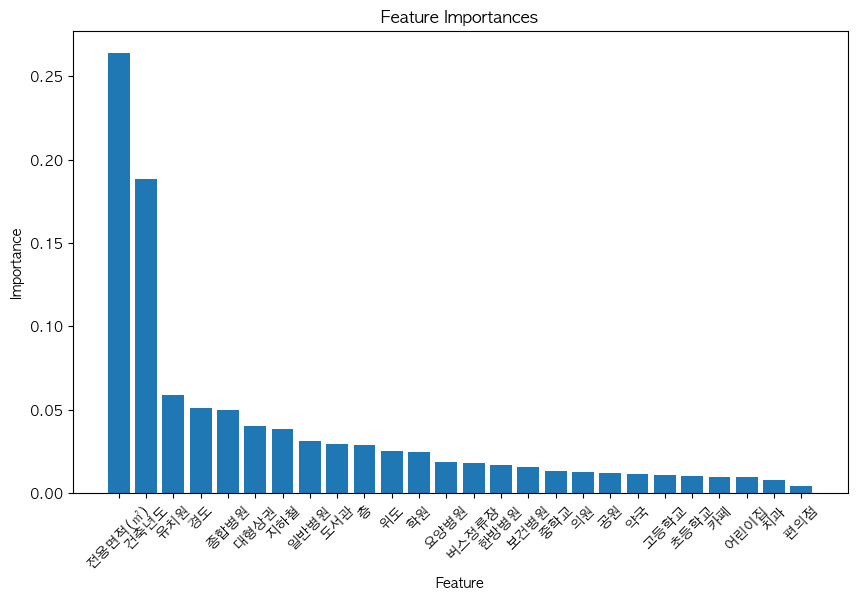

In [22]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc 
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False  

# 특성 중요도를 내림차순으로 정렬
indices = np.argsort(feature_importances)[::-1]
new_list = [x_list[i] for i in indices]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(x.shape[1]), new_list, rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()